# Transfer learning 

_"Transfer learning is the improvement learning in a new task through the transfer of knowledge from a related task that has already been learned."_ 

Commonly used in image analysis but also NLP. Common nets are e.g. 

In [ ]:
InceptionNet [https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202]

In [ ]:
VGG [https://arxiv.org/abs/1409.1556]

In [ ]:
ResNet [https://arxiv.org/abs/1512.03385]

## But first, let's rewind...

### The topology of a (Convolutional) Neural Network

In [2]:
from IPython.display import HTML
imgadd = '<img src="https://shafeentejani.github.io/assets/images/convolutional_neural_network.png", width=800>'
HTML(imgadd)

### The convolution operation

In [3]:
imgadd = '<img src="https://shafeentejani.github.io/assets/images/convolution.gif", width=800>'
HTML(imgadd)

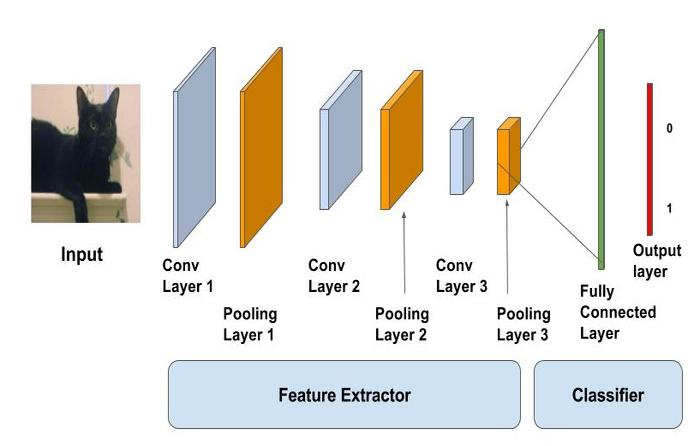

In [1]:
from IPython.display import Image
Image("https://www.learnopencv.com/wp-content/uploads/2017/11/cnn-schema1.jpg")

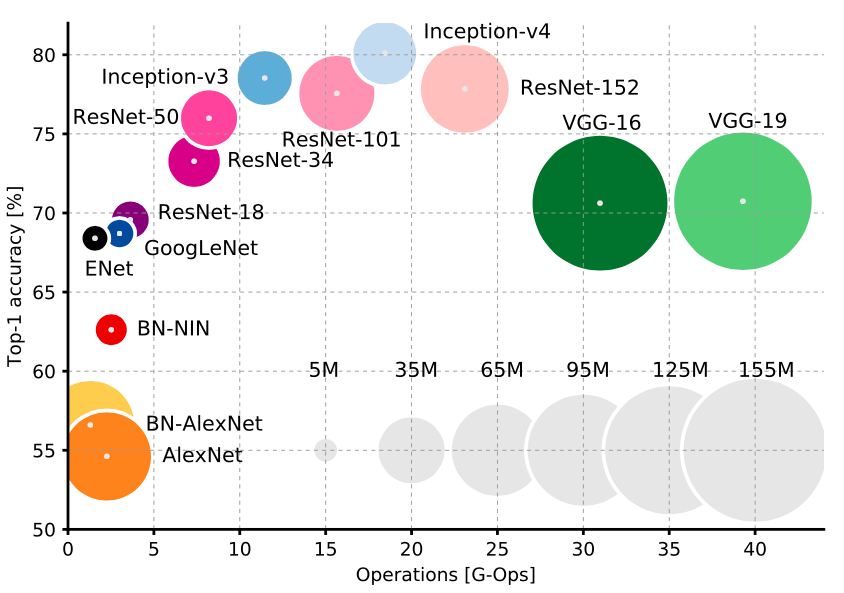

In [2]:
Image("https://i2.wp.com/sefiks.com/wp-content/uploads/2017/12/imagenet-models.png")

## Sample code

Example from: https://www.kaggle.com/dansbecker/transfer-learning/code

#### Specify model 

In [3]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Compile model

In [4]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train model

In [5]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
# The ImageDataGenerator was previously generated with
# data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
# recent changes in keras require that we use the following instead:
data_generator = ImageDataGenerator() 

train_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../input/urban-and-rural-photos/rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/urban-and-rural-photos/rural_and_urban_photos/train'

Useful links: 
* https://machinelearningmastery.com/transfer-learning-for-deep-learning/ 
* https://sefiks.com/2017/12/10/transfer-learning-in-keras-using-inception-v3/
* https://www.youtube.com/watch?time_continue=108&v=mPFq5KMxKVw
* https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8
 